In [49]:
import matplotlib

from matplotlib import colors, ticker, gridspec, rc, transforms
from matplotlib.ticker import PercentFormatter, LogFormatter, FuncFormatter, LogLocator, AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import Counter, OrderedDict

import numpy as np
from numpy import linalg as linalg


import os
from importlib import reload

import myfun as mf
import numpy as np

# setup matplotlib latex use
#matplotlib.use('agg')
rc('text',usetex=True)
rc('text.latex', preamble=r'\usepackage{color}')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'


matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

import matplotlib.pyplot as plt

In [2]:
import numpy.random as rng

In [5]:
rng.randint(4)

0

In [6]:
z={1,3,-1}

In [8]:
z.remove(3)

In [11]:
z, len(z),set(range(3))

({-1, 1}, 2, {0, 1, 2})

In [41]:
nplayers = 2
tot      = 8


def dreidel(nplayers, tot):
    nper     = np.floor(tot/nplayers)
    hands    = nper*np.ones(nplayers)
    pot      = tot - nper*nplayers
    nrolls   = 0
    players  = set(range(nplayers))
    
    nplayerz = nplayers
    done = False
    while nrolls < 10000:
        for pl in range(nplayers):
            
            nrolls += 1

            # ante
            hands[pl] -= 1
            pot       += 1

            # roll
            # wins = [nun, gimmel, hey, shin]
            wins       = np.array([0, pot, np.floor(pot/2), -1])
            win        = max(wins[rng.randint(4)], -1*hands[pl])
            hands[pl] += win
            pot       -= win

            if hands[pl] == 0:
                nplayerz -= 1
            if nplayerz == 1:
                done = True
                break
        if done:
            break
    return nrolls

In [96]:
playersRange = np.arange(2,11)
totRange = np.arange(10,110,10)

sims = np.array([[[dreidel(i,j) for t in range(100)] for i in playersRange] for j in totRange])

In [93]:
np.mean(sims,axis=2)

array([[  10.4,   10.5,    8.5,   13.1,   10.4,   12.9,   13.9,   14.6,
          14.9],
       [  63. ,   21.6,   28.7,   23.3,   29.7,   17.7,   21.2,   24.2,
          24.1],
       [ 156.6,   45.1,   49.6,   58. ,   44. ,   43.9,   39. ,   39.7,
          38.8],
       [ 145.5,   85.2,   72.7,   60.1,   60. ,   61.7,   66. ,   50.9,
          59.2],
       [ 381.1,  113.7,   97.2,  108. ,   77.3,   92.1,   80.5,   75.7,
          63.1],
       [ 541.9,  291.7,  184.6,  109.7,   96.3,  102.1,   89.8,   79.2,
          90.8],
       [ 657. ,  395.5,  185.2,  105. ,  122.6,  110.2,  121.9,  102.3,
         117.7],
       [ 718.7,  550.7,  244.9,  244.3,  151.9,  120. ,  137.7,  167.2,
         126.2],
       [1745.4,  441.7,  287.6,  156.8,  192.7,  160.8,  189. ,  190.6,
         154.2],
       [1218.1,  587.4,  452.7,  259.5,  167.6,  220.3,  205.1,  191.3,
         181.8]])

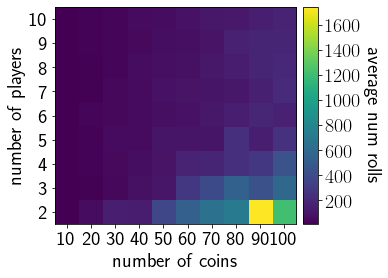

In [95]:
fig,axs=plt.subplots()
im = axs.imshow(np.mean(sims,axis=2).T,origin='lower')
axs.set_yticks(range(playersRange.shape[0]))
axs.set_yticklabels(playersRange)

axs.set_xticks(range(len(totRange)))
axs.set_xticklabels(totRange)

axs.set_xlabel('number of coins')
axs.set_ylabel('number of players')

divider = make_axes_locatable(axs)
cax2     = divider.append_axes("right", size=0.2, pad=0.1)

cbar = fig.colorbar(im, cax=cax2)
cbar.set_label('average num rolls', rotation = 270, labelpad = 20)
cax2.xaxis.set_label_position('top')
cax2.xaxis.set_ticks_position('top')

mf.set_axs_fontsize(axs,20)
mf.set_axs_fontsize(cax2,20)

(array([6.103e+03, 2.646e+03, 8.160e+02, 2.800e+02, 9.700e+01, 3.500e+01,
        1.100e+01, 7.000e+00, 4.000e+00, 1.000e+00]),
 array([  5. ,  17.8,  30.6,  43.4,  56.2,  69. ,  81.8,  94.6, 107.4,
        120.2, 133. ]),
 <a list of 10 Patch objects>)

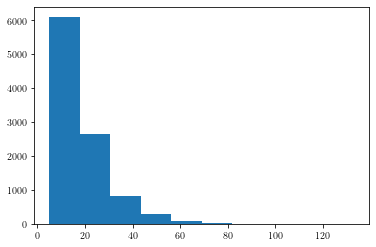

In [63]:
fig,axs=plt.subplots()
axs.hist(sims)

In [24]:
max(wins[rng.randint(4)],-1*hands[pl])

-1.0

In [22]:
wins,-1*hands[pl]

(array([ 0.,  1.,  0., -1.]), -3.0)